In [230]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import Plate_Detector

In [231]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [232]:
idx = 5
Plate_Detector = Plate_Detector.Plate_Detector() #clase

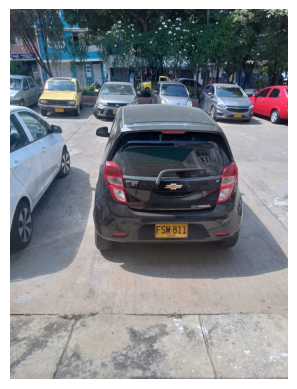

In [233]:
img = cv2.imread(f"./imgs/{idx:03}.jpg")
if img is None:
    img = cv2.imread(f"./imgs/{idx:03}.png")

contraste = 1
brillo = 1
img = cv2.convertScaleAbs(img, alpha=contraste, beta=brillo)
plot_image(img, False)

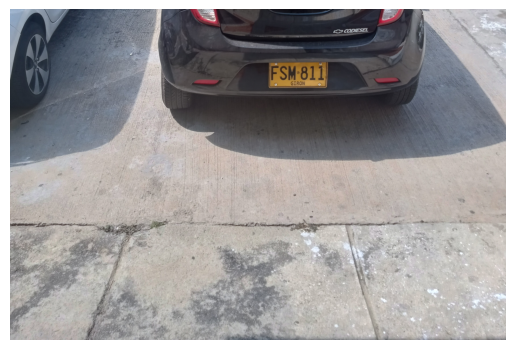

In [234]:
altura, ancho, _ = img.shape
img = img[altura//2:, :]

plot_image(img, False)

In [235]:
lower_yellow = np.array([15, 80, 80])  # Ajusta estos valores
upper_yellow = np.array([35, 255, 255])  # Ajusta estos valores

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# Crear una máscara para los píxeles amarillos
mask = cv2.inRange(hsv, lower_yellow, upper_yellow)

contornos, jerarquia = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#contorno mas grande
contorno_placa = max(contornos, key=cv2.contourArea)

# Obtener las coordenadas del rectángulo que rodea la placa
x, y, w, h = cv2.boundingRect(contorno_placa)

# Dibujar un rectángulo verde alrededor de la placa
cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
#recortar placa
placa = img[y:y + h, x:x + w]

# Mostrar la imagen original y la imagen recortada
cv2.imshow('Imagen Recortada', placa)

# Mostrar la img con el rectángulo verde
cv2.imshow('Placa Marcada', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

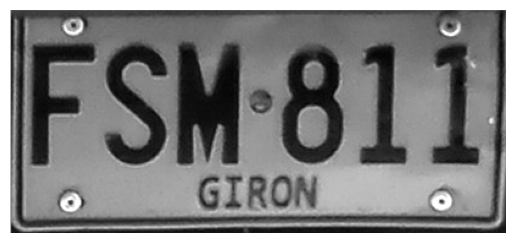

In [236]:
contraste = 1
brillo = 70

gray = Plate_Detector.grayscale(placa)
gray = cv2.convertScaleAbs(gray, alpha=contraste, beta=brillo)
plot_image(gray)

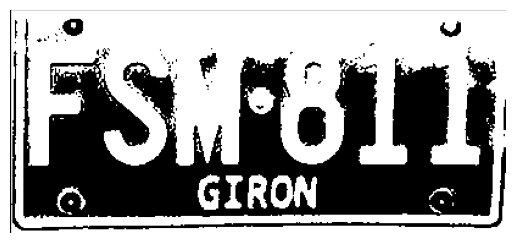

In [237]:
thresh = Plate_Detector.apply_threshold(gray)
plot_image(thresh)